***1. Dataset Generation***

Yash Pandey, 2021A8PS3194H
Pragyan Nath , 2021A4PS3092H
Rahul Das, 2021A8PS2060H
Rachit Papalkar, 2021AAPS3202H
Ayushman Kar, 2021AAPS1983H

In [936]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sdv.lite import SingleTablePreset
from sdv.metadata import SingleTableMetadata

datab = pd.read_excel('diabetes2.xlsx')
datab.head()

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=datab)
metadata.visualize()
synthesizer = SingleTablePreset(
    metadata,
    name='FAST_ML'
)
synthesizer.fit(
    data=datab
)
synthetic_data = synthesizer.sample(
    num_rows=500
)

synthetic_data.head()

synthetic_data.to_csv('file1.csv')

***2. Preprocess and perform exploratory data analysis of the dataset obtained***


In [937]:

import random
X = synthetic_data.drop(columns=['Outcome']).values
y = synthetic_data['Outcome'].values


def train_test_split_custom(X, y, test_size=0.2, random_state=None):
    np.random.seed(random_state)
    n_samples = X.shape[0]
    n_test = int(test_size * n_samples)
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    X_train = X[indices[:-n_test]]
    X_test = X[indices[-n_test:]]
    y_train = y[indices[:-n_test]]
    y_test = y[indices[-n_test:]]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, random_state=42)


def min_max_scaling(X_train, X_test):
    min_val = X_train.min(axis=0)
    max_val = X_train.max(axis=0)
    X_train = (X_train - min_val) / (max_val - min_val)
    X_test = (X_test - min_val) / (max_val - min_val)
    return X_train, X_test

X_train, X_test = min_max_scaling(X_train, X_test)

***Standardized Training and Testing Data Preview***

In [938]:


df_train = pd.DataFrame(X_train, columns=synthetic_data.columns[:-1])
df_test = pd.DataFrame(X_test, columns=synthetic_data.columns[:-1])


df_train.to_csv('standardized_training.csv', index=False)
df_test.to_csv('standardized_testing.csv', index=False)




***3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***


***Stochastic Gradient Descent***

In [939]:
def mean_squared_error(y_true, y_pred):
    n = len(y_true)
    mse = ((y_true - y_pred) ** 2).sum() / n
    return mse

def calculate_accuracy(y_test, y_pred):
    
    
    y_pred = (y_pred >= 0.5).astype(int)

    
    correct_predictions = (y_pred == y_test).sum()
    total_examples = len(y_test)
    accuracy = correct_predictions / total_examples

    return accuracy*100

In [940]:
train_data = pd.read_csv('standardized_training.csv')


X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]

learning_rate = 0.03
n_iterations = 4000
random_state = 0
n, m = X_train_bias.shape
    
st_losses = []
np.random.seed(random_state)
theta = np.random.randn(X_train_bias.shape[1])

for iteration in range(n_iterations):
    random_index = np.random.randint(len(X_train_bias))
    xi = X_train_bias[random_index:random_index+1]
    yi = y_train[random_index:random_index+1]
    gradients = xi.T.dot(xi.dot(theta) - yi)
    theta = theta - learning_rate * gradients
    predictions = xi.dot(theta)
    errors = predictions - yi
    loss = (1 / (2 * n)) * np.sum(errors ** 2)
    st_losses.append(loss)

y_train_pred = X_train_bias.dot(theta)

mse_train = np.mean((y_train - y_train_pred) ** 2)


X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

y_test_pred = X_test_bias.dot(theta)

mse_test = np.mean((y_test - y_test_pred) ** 2)
accu = calculate_accuracy( y_test,y_test_pred)
print("Stochastic Gradient Descent")
print("MSE",mse_test)
print("Accuracy",accu)






Stochastic Gradient Descent
MSE 0.18798826850653683
Accuracy 77.0


***Batch Gradient Descent***

In [941]:


learning_rate = 0.03
n_iterations = 4000

theta = np.random.randn(X_train_bias.shape[1])
n, m = X_train_bias.shape

    
btch_losses = []

for iteration in range(n_iterations):
    gradients = 1/n * X_train_bias.T.dot(X_train_bias.dot(theta) - y_train)
    theta = theta - learning_rate * gradients
    predictions = xi.dot(theta)
    errors = predictions - yi
    loss = (1 / (2 * n)) * np.sum(errors ** 2)
    btch_losses.append(loss)
 
y_train_pred_btch = X_train_bias.dot(theta)




mse_train = mean_squared_error(y_train, y_train_pred_btch)

X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_test_pred = X_test_bias.dot(theta)
mse_test = np.mean((y_test - y_test_pred) ** 2)
accu = calculate_accuracy( y_test,y_test_pred)
print("Batch Gradient Descent")
print("MSE",mse_test)
print("Accuracy ", accu)





Batch Gradient Descent
MSE 0.20897806723235893
Accuracy  68.0


*****Plots*****

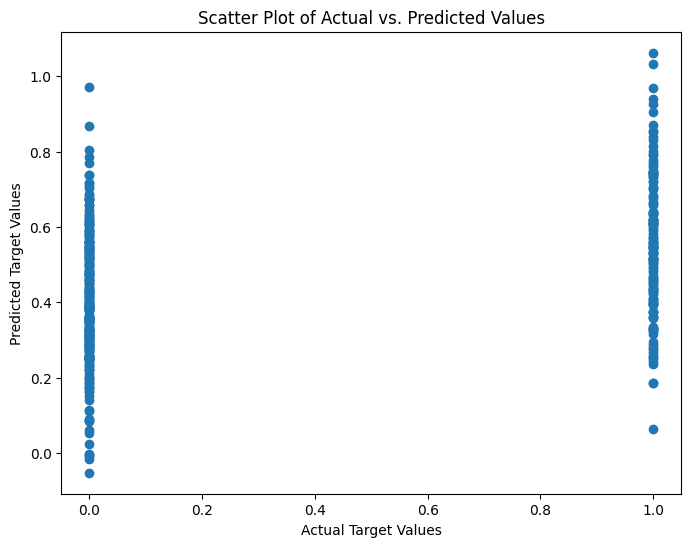

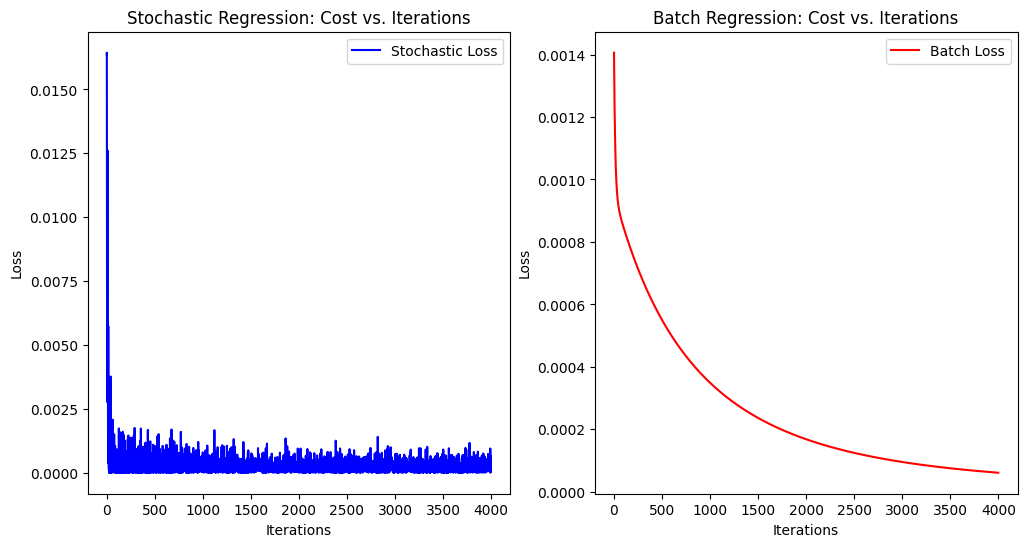

In [942]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.show()

def plot_loss(st_iterations, bt_iterations, stochastic_losses, batch_losses):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(st_iterations, stochastic_losses, label='Stochastic Loss', color='blue')
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Stochastic Regression: Cost vs. Iterations")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(bt_iterations, batch_losses, label='Batch Loss', color='red')
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Batch Regression: Cost vs. Iterations")
    plt.legend()
st_iterations = list(range(1, 4001))
bt_iterations = list(range(1, 4001))
plot_loss(st_iterations, bt_iterations, st_losses, btch_losses)

INSIGHTS AND DIFFERENCES BETWEEN THE STOCHASTIC AND BATCH GRADIENT DESCENT--------------------

Accuracy(Stochastic) = 77
Accuracy(Batch) = 68

Batch uses all data at once, SGD uses one example.
Batch converges smoothly, SGD faster but less stable.
Batch can be computationally expensive, while SGD is efficient.
Batch updates are smoother, SGD updates are noisy.
Batch needs careful learning rate, SGD can adapt.
Batch is less parallelizable, SGD can be parallelized.

Keeping in mind our learning rate and number of iterations , even though stochastic is a bit more chaotic,
overall Stochastic gradient descent fits better to our generated dataset.

***4. Comparison of Lasso and Ridge Regression using Polynomial Regression***

***Lasso Regression***

In [943]:

degree = 4 
alpha_lasso = 0.01
alpha_ridge = 0.01 
def create_polynomial_features(X, degree):
    X_poly = X.copy()
    for d in range(2, degree + 1):
        X_poly = np.column_stack((X_poly, X ** d))
    return X_poly

X_train_poly_lasso = create_polynomial_features(X_train, degree)
X_test_poly_lasso = create_polynomial_features(X_test, degree)

X_train_poly_ridge = create_polynomial_features(X_train, degree)
X_test_poly_ridge = create_polynomial_features(X_test, degree)

def lasso_regression(X, y, alpha, learning_rate, iterations):
    n, m = X.shape
    theta = np.zeros(m)
    losses = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / n) * X.T.dot(errors) + (alpha / n) * np.sign(theta)
        theta -= learning_rate * gradient
        loss = (1 / (2 * n)) * np.sum(errors ** 2)
        losses.append(loss)

    return theta, losses

lasso_iterations = 1000 
lasso_learning_rate = 0.01 
lasso_theta, lasso_losses = lasso_regression(X_train_poly_lasso, y_train, alpha_lasso, lasso_learning_rate, lasso_iterations)


y_pred_lasso = X_test_poly_lasso.dot(lasso_theta)

***Ridge Regression***

In [944]:
def ridge_regression(X, y, alpha, learning_rate, iterations):
    n, m = X.shape
    theta = np.zeros(m)
    losses = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = (1 / n) * X.T.dot(errors) + (alpha / n) * theta
        theta -= learning_rate * gradient
        loss = (1 / (2 * n)) * np.sum(errors ** 2)
        losses.append(loss)

    return theta, losses


ridge_iterations = 1000
ridge_learning_rate = 0.01
ridge_theta, ridge_losses = ridge_regression(X_train_poly_ridge, y_train, alpha_ridge, ridge_learning_rate, ridge_iterations)


y_pred_ridge = X_test_poly_ridge.dot(ridge_theta)

***Plots***

Accuracy (Lasso):  60.0
Accuracy (Ridge):  60.0


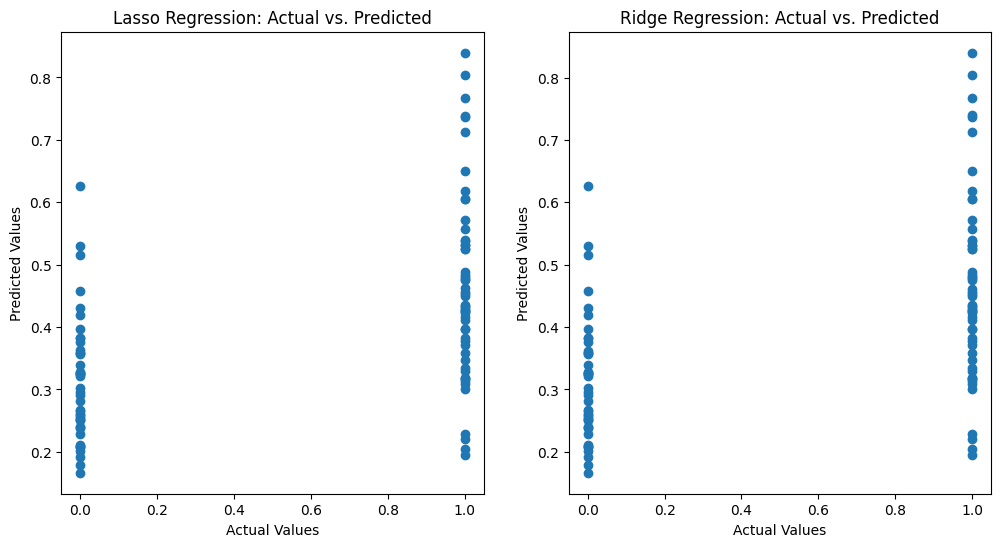

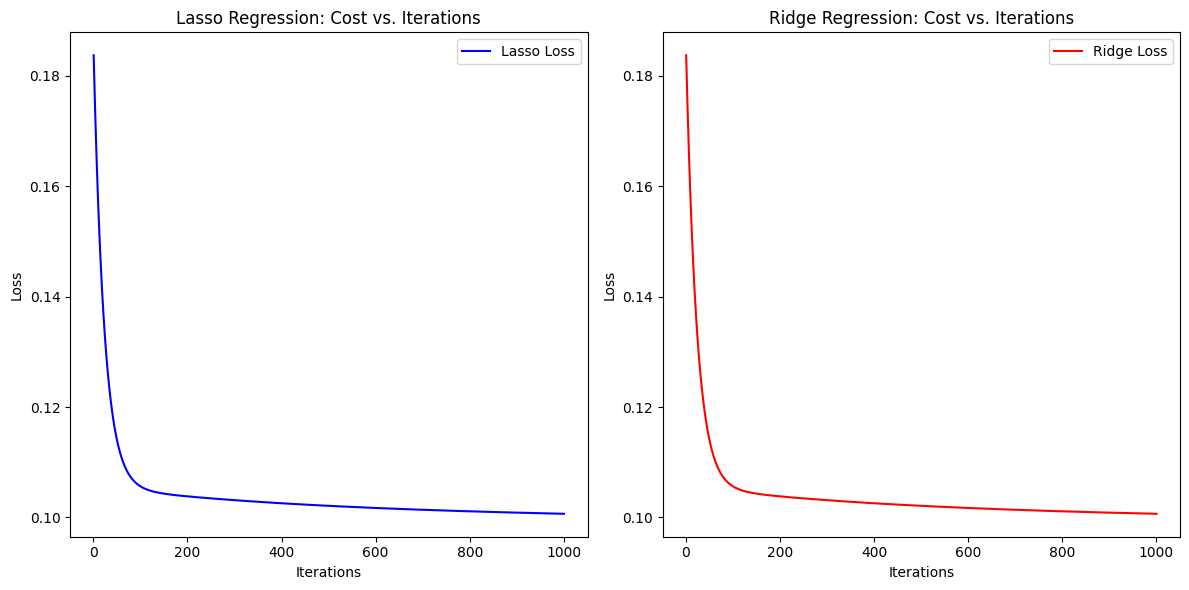

In [945]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lasso)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression: Actual vs. Predicted")


plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Ridge Regression: Actual vs. Predicted")




def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

best_alpha_lasso = None
best_alpha_ridge = None
best_degree = None
best_iterations = None
min_mse = float('inf')

alphas = [0.001, 0.01, 0.1]  
degrees = [2, 3, 4]          
iterations_list = [100, 500, 1000]  

for alpha_lasso in alphas:
    for alpha_ridge in alphas:
        for degree in degrees:
            for iterations in iterations_list:
                X_train_poly_lasso = create_polynomial_features(X_train, degree)
                X_test_poly_lasso = create_polynomial_features(X_test, degree)

                X_train_poly_ridge = create_polynomial_features(X_train, degree)
                X_test_poly_ridge = create_polynomial_features(X_test, degree)

                lasso_theta, _ = lasso_regression(X_train_poly_lasso, y_train, alpha_lasso, lasso_learning_rate, iterations)

                y_pred_lasso = X_test_poly_lasso.dot(lasso_theta)

                ridge_theta, _ = ridge_regression(X_train_poly_ridge, y_train, alpha_ridge, ridge_learning_rate, iterations)

                y_pred_ridge = X_test_poly_ridge.dot(ridge_theta)

                mse_lasso = mean_squared_error(y_test, y_pred_lasso)
                mse_ridge = mean_squared_error(y_test, y_pred_ridge)

                avg_mse = (mse_lasso + mse_ridge) / 2

                if avg_mse < min_mse:
                    min_mse = avg_mse
                    best_alpha_lasso = alpha_lasso
                    best_alpha_ridge = alpha_ridge
                    best_degree = degree
                    best_iterations = iterations

X_train_poly_lasso = create_polynomial_features(X_train, best_degree)
X_test_poly_lasso = create_polynomial_features(X_test, best_degree)

X_train_poly_ridge = create_polynomial_features(X_train, best_degree)
X_test_poly_ridge = create_polynomial_features(X_test, best_degree)

lasso_theta, _ = lasso_regression(X_train_poly_lasso, y_train, best_alpha_lasso, lasso_learning_rate, best_iterations)
ridge_theta, _ = ridge_regression(X_train_poly_ridge, y_train, best_alpha_ridge, ridge_learning_rate, best_iterations)

y_pred_lasso = X_test_poly_lasso.dot(lasso_theta)
y_pred_ridge = X_test_poly_ridge.dot(ridge_theta)

final_mse_lasso = mean_squared_error(y_test, y_pred_lasso)
final_mse_ridge = mean_squared_error(y_test, y_pred_ridge)

average_final_mse = (final_mse_lasso + final_mse_ridge) / 2


variance_y_test = np.var(y_test)
accu_lasso = calculate_accuracy(y_test, y_pred_lasso)
accu_ridge = calculate_accuracy(y_test, y_pred_ridge)


print("Accuracy (Lasso): ", accu_lasso)
print("Accuracy (Ridge): ", accu_ridge)


def plot_loss(iterations, lasso_losses, ridge_losses):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(iterations, lasso_losses, label='Lasso Loss', color='blue')
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Lasso Regression: Cost vs. Iterations")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(iterations, ridge_losses, label='Ridge Loss', color='red')
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Ridge Regression: Cost vs. Iterations")
    plt.legend()


lasso_theta, lasso_losses = lasso_regression(X_train_poly_lasso, y_train, best_alpha_lasso, lasso_learning_rate, best_iterations)

ridge_theta, ridge_losses = ridge_regression(X_train_poly_ridge, y_train, best_alpha_ridge, ridge_learning_rate, best_iterations)

iterations = list(range(1, best_iterations + 1))

plot_loss(iterations, lasso_losses, ridge_losses)


plt.tight_layout()
plt.show()

INSIGHTS AND DIFFERENCES BETWEEN LASSO AND RIDGE REGRESSION FOR POLYNOMIAL REGRESSION--------------------

Accuracy(Lasso) = 60
Accuracy(Ridge) = 60

Lasso can lead to feature selection, setting some coefficients to zero.
meanwhile, in ridge regression, all features are retained, but their contributions are reduced.

Keeping in mind our learning rate and number of iterations, both give the same accuracy. This is because the performance difference between Lasso and Ridge can be more pronounced when you have a larger dataset. For smaller datasets, the regularization effects might not be as prominent, leading to similar outcomes.

***5. Comparison of Logistic Regression and Least Squares Classification***


***Logistic Regression***

In [946]:
train_data = pd.read_csv('standardized_training.csv')
test_data = pd.read_csv('standardized_testing.csv')

X_train = train_data.values

X_test = test_data.values

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(y, y_pred):
    m = len(y)
    cost = -1/m * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost


lg_losses = []
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    
    for i in range(num_iterations):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)
        loss = cost_function(y,y_pred)
        lg_losses.append(loss)
        gradient = np.dot(X.T, (y_pred - y)) / m
        theta -= learning_rate * gradient
    return theta

theta = np.zeros(X_train.shape[1])
learning_rate = 0.07
log_num_iterationsnum_iterations = 10000

for i in range(X_train.shape[1]):
    X_train[:,i] = X_train[:,i] + 1
theta = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)

for i in range(X_test.shape[1]):
    X_test[:,i] = X_test[:,i] + 1

y_test_pred = sigmoid(np.dot(X_test, theta))
tp=0
tn=0
fp=0
fn=0
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)

for i in range(y_test.shape[0]):
    
    if y_test_pred_binary[i] - y_test[i] == 0 and y_test[i] == 1:
        tp+=1
    elif y_test_pred_binary[i] - y_test[i] == 0 and y_test[i] == 0:
        tn+=1
    elif y_test_pred_binary[i] - y_test[i] == 1:
        fp+=1
    elif y_test_pred_binary[i] - y_test[i] == -1:
        fn+=1
        
print("Logistic Regression")
print("Confusion Matrix:")
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("True Positives (TP):", tp)
mse_test = np.mean((y_test - y_test_pred) ** 2)
accu = calculate_accuracy( y_test,y_test_pred)
print("MSE",mse_test)
print("Accuracy  " ,accu)

Logistic Regression
Confusion Matrix:
True Negatives (TN): 43
False Positives (FP): 2
False Negatives (FN): 45
True Positives (TP): 10
MSE 0.2655165728163666
Accuracy   53.0


***Least Squares Classification***

In [947]:
train_data = pd.read_csv('standardized_training.csv')
test_data = pd.read_csv('standardized_testing.csv')

X_train = train_data.values
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = test_data.values
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

def hypothesis(X, theta):
   
    return X.dot(theta)

def cost_function(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

cost_history = []
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    

    for i in range(num_iterations):
        predictions = hypothesis(X, theta)
        gradient = (1 / m) * X.T.dot(predictions - y)
        theta -= learning_rate * gradient
        cost = cost_function(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history


learning_rate = 0.07
num_iterations = 10000


theta = np.zeros(X_train.shape[1])


theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)


predictions = hypothesis(X_train, theta)
predicted_labels = (predictions >= 0.5).astype(int)

y_pred = X_test.dot(theta)


print("Least Squares Classification")
accu = calculate_accuracy( y_test,y_pred)
print("Accuracy", accu)

Least Squares Classification
Accuracy 67.0


***Plots***


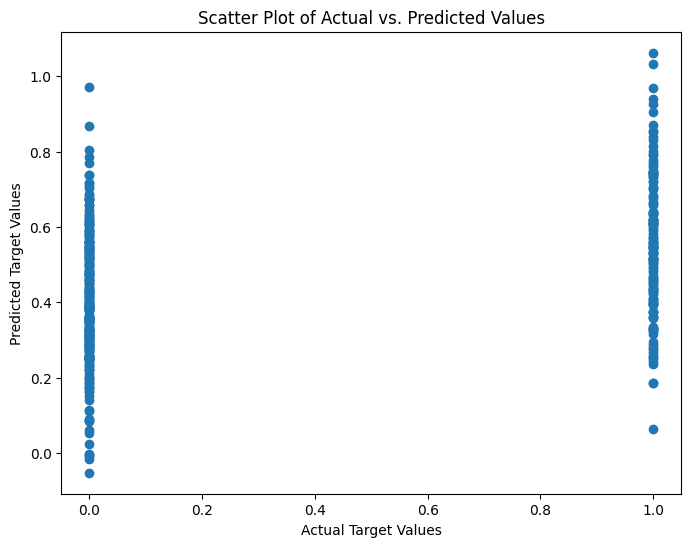

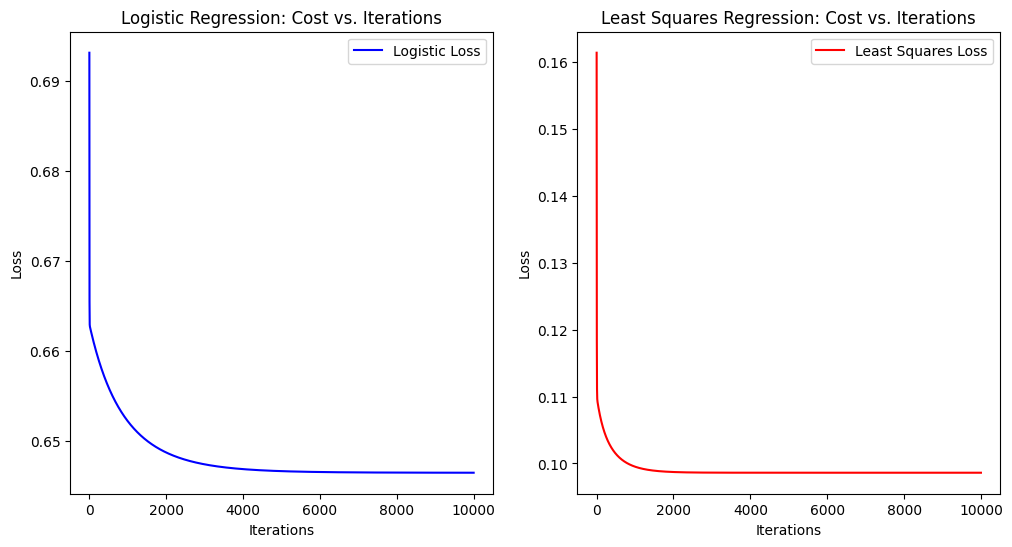

In [948]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Target Values")
plt.title("Scatter Plot of Actual vs. Predicted Values")
plt.show()

def plot_loss(log_num_iterations,ls_iterations,  stochastic_losses, ls_losses):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(log_iterations, lg_losses, label='Logistic Loss', color='blue')
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Logistic Regression: Cost vs. Iterations")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(ls_iterations, ls_losses, label='Least Squares Loss', color='red')
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title("Least Squares Regression: Cost vs. Iterations")
    plt.legend()

    
log_iterations = list(range(1, 10001))
ls_iterations = list(range(1, 10001))
plot_loss(log_iterations, ls_iterations, lg_losses, cost_history)

INSIGHTS AND DIFFERENCES BETWEEN LOGISTIC REGRESSION AND LEAST SQUARES CLASSIFICATION--------------------

Accuracy(Lasso) = 53
Accuracy(Ridge) = 67

Logistic regression is used for binary or multi-class classification problems. It models the probability of a sample belonging to a particular class.
Least squares classification is typically used for binary classification problems. It aims to find a linear decision boundary that separates the two classes.

Keeping in mind our learning rate and number of iterations, least squares classification gives signicantly more accuracy. 